In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
X = df.drop('Attrition', axis=1)
#X.drop(['EmployeeNumber'], axis=1, inplace=True)
X

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,Travel_Rarely,Human Resources,13,3,Human Resources,1844,1,Male,...,3,3,4,3,2,2,2,0,5,1


In [6]:
y = df['Attrition']
y

0       0
1       0
2       1
3       0
4       0
       ..
1623    1
1624    1
1625    1
1626    1
1627    1
Name: Attrition, Length: 1628, dtype: int64

In [143]:
X.loc[:, X.dtypes == "object"]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Non-Travel,Research & Development,Medical,Female,Laboratory Technician,Single,No
1,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes
2,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
3,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,No
4,Travel_Rarely,Research & Development,Other,Male,Manufacturing Director,Married,No
...,...,...,...,...,...,...,...
1623,Travel_Frequently,Research & Development,Medical,Male,Research Scientist,Divorced,Yes
1624,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
1625,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Married,No
1626,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Divorced,Yes


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.loc[:, "Department"] = le.fit_transform(X.loc[:, "Department"])
X.BusinessTravel = le.fit_transform(X.BusinessTravel)
X.EducationField = le.fit_transform(X.EducationField)
X.Gender = le.fit_transform(X.Gender)
X.JobRole = le.fit_transform(X.JobRole)
X.MaritalStatus = le.fit_transform(X.MaritalStatus)
X.OverTime = le.fit_transform(X.OverTime)
#X.drop(X.loc[:, X.dtypes == 'object'], axis=1)
#X.loc[:, X.dtypes == 'object'].apply(le.fit_transform)
X = X.drop(['Id', 'Behaviour'], axis=1)

In [32]:
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,1,2,3,3,3,0,3,2,...,14,3,0,12,2,11,7,6,7,4
1,36,2,1,12,4,1,3,0,3,4,...,12,3,2,7,2,3,2,1,1,2
2,55,2,2,2,1,3,3,1,3,7,...,16,3,0,12,3,9,7,7,3,5
3,39,2,1,24,1,1,1,1,3,6,...,13,3,0,18,2,7,7,1,7,4
4,37,2,1,3,3,4,3,1,3,4,...,15,3,1,10,2,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,42,1,1,19,3,3,3,1,4,6,...,12,3,0,7,2,2,2,2,2,3
1624,55,2,2,2,1,3,3,1,3,7,...,16,3,0,12,3,9,7,7,3,5
1625,25,2,2,9,2,1,1,1,2,8,...,12,3,0,6,2,3,2,2,2,5
1626,29,2,0,13,3,0,1,1,2,1,...,15,3,3,4,3,2,2,2,0,5


In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)
# X_test = sc_X.transform(X_test)
X_train

array([[-0.59559529, -2.58210279, -0.53799741, ...,  1.25930937,
         0.98714901,  0.61366721],
       [ 0.03739076,  0.6353969 , -0.53799741, ..., -0.33440616,
        -0.73042697, -0.80644681],
       [ 2.0418466 ,  0.6353969 ,  1.26048264, ...,  1.57805248,
        -0.15790164,  1.32372422],
       ...,
       [-1.12308367,  0.6353969 ,  1.26048264, ..., -0.01566305,
        -0.4441643 ,  1.32372422],
       [-0.70109297,  0.6353969 , -2.33647747, ..., -0.01566305,
        -1.01668963,  1.32372422],
       [-0.70109297,  0.6353969 , -0.53799741, ..., -0.65314926,
        -0.73042697, -0.80644681]])

In [194]:
# X_mod = pd.concat([X.drop(X.loc[:, X.dtypes == 'object'], axis=1), X.loc[:, X.dtypes == 'object'].apply(le.fit_transform)], keys=['id'])
# X_mod = X_mod.drop(['EmployeeNumber'], axis=1)
len(X.columns)

25

In [13]:
# Using ANN
# Importing the Keras libraries and packages
import keras 
from keras.models import Sequential # Initialise neural network
from keras.layers import Dense # Used to create layers in ANN

# Initialising the ANN
classifier = Sequential() # Main structure

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25)) # Adding sections/parts to the main structure

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y, batch_size = 10, epochs = 100)

Epoch 1/100
1628/1628 [==============================] - 0s 286us/step - loss: 0.6523 - accuracy: 0.6542
Epoch 2/100
1628/1628 [==============================] - 0s 149us/step - loss: 0.4985 - accuracy: 0.7666
Epoch 3/100
1628/1628 [==============================] - 0s 156us/step - loss: 0.4617 - accuracy: 0.7875
Epoch 4/100
1628/1628 [==============================] - 0s 141us/step - loss: 0.4426 - accuracy: 0.8034
Epoch 5/100
1628/1628 [==============================] - 0s 148us/step - loss: 0.4285 - accuracy: 0.8133
Epoch 6/100
1628/1628 [==============================] - 0s 144us/step - loss: 0.4133 - accuracy: 0.8219
Epoch 7/100
1628/1628 [==============================] - 0s 151us/step - loss: 0.3981 - accuracy: 0.8372
Epoch 8/100
1628/1628 [==============================] - 0s 147us/step - loss: 0.3844 - accuracy: 0.8434
Epoch 9/100
1628/1628 [==============================] - 0s 147us/step - loss: 0.3701 - accuracy: 0.8483
Epoch 10/100
1628/1628 [==============================]

In [21]:
y_pred = classifier.predict(X_test)
y_pred

array([[3.23169047e-09],
       [8.95785661e-07],
       [1.04044467e-07],
       [7.19094544e-07],
       [9.06238418e-11],
       [1.06791717e-07],
       [2.93376215e-04],
       [1.29704878e-08],
       [6.18487895e-01],
       [9.68117360e-03],
       [1.52666393e-10],
       [8.24313603e-11],
       [2.21686998e-16],
       [6.80878964e-12],
       [5.21511833e-15],
       [2.11242952e-08],
       [3.11851725e-02],
       [6.36200923e-07],
       [5.73330272e-12],
       [2.30346586e-06],
       [8.94800234e-09],
       [9.99686360e-01],
       [4.61565241e-06],
       [1.00819151e-18],
       [3.76174362e-15],
       [1.25300605e-12],
       [9.88913357e-01],
       [1.71580095e-09],
       [9.99999642e-01],
       [1.34605287e-07],
       [4.76627790e-22],
       [1.28057842e-09],
       [1.31773949e-03],
       [1.07882247e-12],
       [6.01920237e-06],
       [2.20675011e-19],
       [1.29278004e-13],
       [1.36931894e-12],
       [4.02778126e-02],
       [7.76722615e-08],


In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.9994333250221004

In [17]:
y_pred = (y_pred > .50)

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(837, 6, 0, 785)

In [19]:
#(503, 140, 225, 353)
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall :", tp/(tp+fn))

Accuracy:  0.9963144963144963
Precision:  0.9924146649810367
Recall : 1.0


In [39]:
from sklearn.metrics import roc_curve
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Check the false positive rates
fpr.shape, tpr.shape

((3,), (3,))

In [34]:
# Importing & label encoding test dataset
Xtest = pd.read_csv("test.csv")
le = LabelEncoder()
Xtest = Xtest.drop(["EmployeeNumber"], axis=1)
Xtest.loc[:, "Department"] = le.fit_transform(Xtest.loc[:, "Department"])
Xtest.BusinessTravel = le.fit_transform(Xtest.BusinessTravel)
Xtest.EducationField = le.fit_transform(Xtest.EducationField)
Xtest.Gender = le.fit_transform(Xtest.Gender)
Xtest.JobRole = le.fit_transform(Xtest.JobRole)
Xtest.MaritalStatus = le.fit_transform(Xtest.MaritalStatus)
Xtest.OverTime = le.fit_transform(Xtest.OverTime)
Xtest = Xtest.drop(["Id", "Behaviour"], axis=1)
X_test = sc_X.transform(Xtest)

In [33]:
# Predicting Attrition from test dataset
y_predTest = classifier.predict(X_test)
y_predTest = y_predTest.reshape(1, -1)
y_predTest[0].ndim

1

In [50]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y) # Regressor learns the corelations from the training dataset

y_pred = regressor.predict(X_test)
y_pred

array([ 2.27790592e-01,  6.58695626e-02,  4.94047389e-01,  5.64664973e-01,
       -2.18519543e-02,  1.16574237e-01,  5.02688343e-01,  2.57131095e-01,
        4.92672522e-01,  8.48724668e-02, -1.50434558e-01,  5.26389707e-01,
        8.89881324e-02,  2.61679658e-01,  1.27030466e-01,  3.90448092e-01,
        4.38976649e-01,  6.53773150e-01,  1.64165916e-01,  7.82479624e-04,
        3.88964261e-03,  9.80398269e-01,  1.20595722e-01,  1.60350950e-01,
        2.72754976e-01,  1.52113598e-01,  1.43942778e-01,  1.73711610e-01,
        7.43010178e-01,  3.95849717e-01,  9.77827337e-02,  4.58602507e-01,
        4.08564471e-01,  6.35201364e-01, -2.42975998e-02,  1.40144605e-01,
        1.27473049e-01, -2.36957846e-02,  5.94044001e-01,  6.17650608e-01,
        9.18346033e-01,  5.65258446e-01, -5.65132376e-02,  1.67990759e-01,
       -2.36916967e-01,  3.55427890e-01,  2.32236829e-01,  1.65630435e-01,
       -4.26898573e-01,  5.14755174e-01,  3.18309677e-01,  2.02737578e-01,
        5.29151683e-01,  

In [34]:
# Turning results into csv file
data = {"Id": pd.read_csv("test.csv")["Id"],
        "Attrition": y_predTest[0]}
predictions = pd.DataFrame(data, columns = ["Id", "Attrition"]).to_csv("Submissions/Submission11.csv")

In [48]:
regressor.score(X_train, y_pred)

1.0

In [234]:
# Building the optimal model using Backward Elimination 
# 1. Appending the vector of ones to the X dataset i.e, 
X = np.append(arr=np.ones((1628, 1)).astype(int), values=X, axis=1)

In [246]:
# 2. Backward Elimination
import statsmodels.regression.linear_model as sm

def backwardElimination(x, SL): 
    numVars = len(x[0])  # number of columns 
    temp = np.zeros((1628,25)).astype(int) # creating an empty matrix of size (50, 6)

    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()  # fitting the model with OLS regressor 
        maxVar = float(max(regressor_OLS.pvalues))  # finding max p-value
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:, j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
                    
    regressor_OLS.summary()
    return x 

In [247]:
SL = 0.05
X_opt = X # Optimal matrix feature
X_opt = np.array(X_opt, dtype=float)
X_Modeled = backwardElimination(X_opt, SL)

                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   0.652
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              136.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:10:41   Log-Likelihood:                         -856.84
No. Observations:                1628   AIC:                                      1758.
Df Residuals:                    1606   BIC:                                      1876.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [250]:
classifier.predict(X_Modeled)

ValueError: Error when checking input: expected dense_19_input to have shape (25,) but got array with shape (22,)

In [229]:
y_pred = (y_pred > .5)

In [230]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(654, 189, 180, 605)

In [231]:
print("Accuracy: ", (tp+tn)/(tp+fp+tn+fn))
print("Precision: ", tp/(tp+fp))
print("Recall :", tp/(tp+fn))

Accuracy:  0.7733415233415234
Precision:  0.7619647355163728
Recall : 0.7707006369426752


In [20]:
# Let's try Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest model
rf = RandomForestRegressor(n_estimators=400)
rf.fit(X_train, y)

# Check the score of the Random Forest model on test data
rf.score(X_train, y)

0.9825294840235435

In [21]:
rf.predict(X_test)

array([0.1075, 0.03  , 0.06  , 0.215 , 0.0425, 0.225 , 0.7975, 0.09  ,
       0.1325, 0.065 , 0.02  , 0.1975, 0.025 , 0.02  , 0.025 , 0.02  ,
       0.46  , 0.065 , 0.06  , 0.0025, 0.025 , 0.71  , 0.0875, 0.0175,
       0.23  , 0.0025, 0.075 , 0.03  , 0.9   , 0.0125, 0.0325, 0.0975,
       0.48  , 0.4875, 0.005 , 0.07  , 0.1025, 0.1825, 0.0775, 0.1175,
       0.925 , 0.1775, 0.0775, 0.015 , 0.0425, 0.04  , 0.0925, 0.1025,
       0.0275, 0.19  , 0.5975, 0.0525, 0.3475, 0.405 , 0.1875, 0.1525,
       0.025 , 0.5725, 0.0325, 0.11  , 0.065 , 0.0325, 0.35  , 0.    ,
       0.1425, 0.115 , 0.025 , 0.08  , 0.035 , 0.1475, 0.115 , 0.0125,
       0.0375, 0.1725, 0.3725, 0.3675, 0.0375, 0.0775, 0.04  , 0.3825,
       0.05  , 0.275 , 0.285 , 0.005 , 0.275 , 0.09  , 0.15  , 0.1325,
       0.04  , 0.175 , 0.2975, 0.05  , 0.2025, 0.095 , 0.76  , 0.605 ,
       0.47  , 0.1225, 0.195 , 0.015 , 0.105 , 0.065 , 0.0375, 0.275 ,
       0.21  , 0.1375, 0.045 , 0.0975, 0.0525, 0.13  , 0.125 , 0.155 ,
      

In [14]:
X_test

array([[-0.80659065,  0.6353969 , -0.53799741, ..., -0.65314926,
         0.12836102,  1.32372422],
       [-0.49009762,  0.6353969 ,  1.26048264, ...,  0.94056627,
         0.98714901, -0.0963898 ],
       [ 0.14288844,  0.6353969 , -0.53799741, ...,  1.25930937,
         0.98714901,  0.61366721],
       ...,
       [-1.22858135,  0.6353969 , -0.53799741, ..., -0.33440616,
         0.12836102, -1.51650382],
       [-0.49009762,  0.6353969 , -0.53799741, ...,  1.57805248,
         1.27341167, -0.0963898 ],
       [ 0.03739076,  0.6353969 , -0.53799741, ..., -0.65314926,
        -0.4441643 ,  1.32372422]])

In [24]:
y_pred.reshape(1, -1)[0]

array([3.23169047e-09, 8.95785661e-07, 1.04044467e-07, 7.19094544e-07,
       9.06238418e-11, 1.06791717e-07, 2.93376215e-04, 1.29704878e-08,
       6.18487895e-01, 9.68117360e-03, 1.52666393e-10, 8.24313603e-11,
       2.21686998e-16, 6.80878964e-12, 5.21511833e-15, 2.11242952e-08,
       3.11851725e-02, 6.36200923e-07, 5.73330272e-12, 2.30346586e-06,
       8.94800234e-09, 9.99686360e-01, 4.61565241e-06, 1.00819151e-18,
       3.76174362e-15, 1.25300605e-12, 9.88913357e-01, 1.71580095e-09,
       9.99999642e-01, 1.34605287e-07, 4.76627790e-22, 1.28057842e-09,
       1.31773949e-03, 1.07882247e-12, 6.01920237e-06, 2.20675011e-19,
       1.29278004e-13, 1.36931894e-12, 4.02778126e-02, 7.76722615e-08,
       9.99999523e-01, 9.99441326e-01, 9.27189205e-08, 4.49929661e-16,
       4.02416442e-14, 3.63609365e-09, 2.70208911e-05, 2.37753557e-05,
       2.10099509e-14, 1.11441128e-02, 9.38578069e-01, 2.56028601e-11,
       3.82425895e-07, 9.81585741e-01, 7.99204290e-13, 2.49054836e-04,
      

In [25]:
# Turning results into csv file
data = {"Id": pd.read_csv("test.csv")["Id"],
        "Attrition": y_pred.reshape(1, -1)[0]}
predictions = pd.DataFrame(data, columns = ["Id", "Attrition"]).to_csv("Submissions/Submission12.csv")

In [32]:
# Let's use SVR
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', C=.86, gamma=.1)
regressor.fit(X_train, y)

regressor.score(X_train, y)

0.9626866989000749

In [33]:
regressor.predict(X_test)

array([ 4.15979857e-02,  1.28024531e-01,  1.90346227e-01,  1.72945287e-01,
        1.08995262e-01,  1.99596863e-01,  1.82029953e-01,  1.53457615e-01,
        1.56947976e-01, -1.92705480e-02,  2.13934867e-01,  1.74413957e-01,
       -4.65841198e-02,  2.22086727e-02,  1.09422829e-01,  2.21482429e-01,
        3.63986509e-01,  1.68073447e-01,  2.24513129e-01,  1.08243817e-01,
        1.29741093e-01,  5.35638765e-01,  1.57678047e-01,  1.93124061e-01,
        1.59925690e-01,  1.60757023e-01,  2.11604731e-01, -7.17730879e-02,
        4.20484386e-01,  2.50034235e-01, -1.40797972e-01,  1.95472806e-01,
        3.20785819e-01,  1.71339916e-01,  1.09502008e-01,  1.82794923e-01,
        2.01213031e-01,  2.64256054e-01, -5.77310568e-02,  2.55086934e-01,
        5.19194436e-01,  4.15108479e-01,  1.70271669e-01,  5.50355798e-02,
        1.48447280e-01,  2.41617510e-02,  1.66420755e-01,  1.28336990e-01,
        1.31822766e-01,  3.88116845e-01,  2.72092533e-01, -2.47721728e-04,
        3.60322671e-01,  

In [39]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y)
clf.score(X_train, y)

0.7628992628992629

In [45]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression


# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"RandomForestClassifier": RandomForestClassifier(),
          "LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(max_iter=10),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}
auc_score = {}

# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y)
    results[model_name] = model.score(X_train, y)
    

# View the results
results

C:\Users\YuvrajSK\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\YuvrajSK\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'RandomForestClassifier': 1.0,
 'LinearSVC': 0.765970515970516,
 'KNN': 0.9127764127764127,
 'SVC': 0.6302211302211302,
 'LogisticRegression': 0.7628992628992629}

In [59]:
models["KNN"].predict(X_train)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
models["RandomForestClassifier"].predict_proba(X_test)[:, 1][:5]

array([0.06, 0.08, 0.15, 0.16, 0.04])

In [66]:
# Turning results into csv file
data = {"Id": pd.read_csv("test.csv")["Id"],
        "Attrition": models["RandomForestClassifier"].predict_proba(X_test)[:, 1]}
predictions = pd.DataFrame(data, columns = ["Id", "Attrition"]).to_csv("Submissions/Submission13.csv")

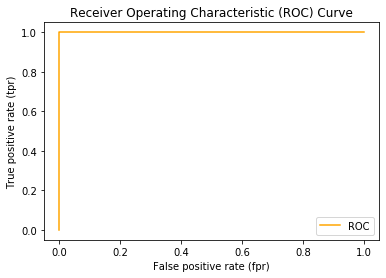

1.0

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y, models["RandomForestClassifier"].predict_proba(X_train)[:, 1])

# Check the false positive rates
fpr, tpr

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)
roc_auc_score(y, models["RandomForestClassifier"].predict_proba(X_train)[:, 1])